# T-test

Replication in python of the t-test tutorial from UC Business Analytics R Programming Guide, 

[Tutorial Link](https://uc-r.github.io/t_test)

Datasets used wihin the tutorial:

1. [Midwest Dataset](https://vincentarelbundock.github.io/Rdatasets/doc/ggplot2/midwest.html) : Demographic information of midwest counties

2. [Student's Sleep Data](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/sleep.html) : Dataset which show the effect of two soporific drugs (increase in hours of sleep compared to control) on 10 patients.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

df_sleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
df_midwest = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/midwest.csv")

## One Sample t-test

"The One Sample t-test determines whether the sample mean is statistically different from a known or hypothesized population mean." - [One Samplet t-test](https://libguides.library.kent.edu/SPSS/OneSampletTest)

In the tutorial using the midwest dataset, the percentage of college educated adults in the midwest is compared to the nation-wide average of college educated adults.

In particular it is tested if the midwest average is less than the national average with a value of [32% (Bachelor's degree or higher)](https://en.wikipedia.org/wiki/Educational_attainment_in_the_United_States) . 

In [2]:
# summary of percent college educated
df_midwest["percollege"].describe()

count    437.000000
mean      18.272736
std        6.261908
min        7.336108
25%       14.113725
50%       16.797562
75%       20.549893
max       48.078510
Name: percollege, dtype: float64

From the dataset the average precentage of educated adults in the midwest is 18.27%

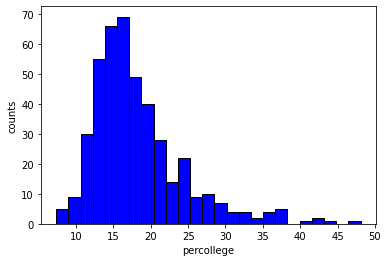

In [3]:
# histogram plot
plt.hist(x=df_midwest["percollege"], bins=25, facecolor='blue', ec="black");
plt.ylabel("counts")
plt.xlabel("percollege");

The histogram reflects the values displayed in the summary above and clearly shows that the percentage of educated adults is well below the 32% national average.

In [4]:
# perform one sample t-test
stats.ttest_1samp(a=df_midwest["percollege"], popmean=32)

Ttest_1sampResult(statistic=-45.82664051914215, pvalue=8.379166816954861e-169)

The one sample t-test performed above gives,

t-statistic = 45.827

p-value < 0.001

### Interpretation of the results

The two hypothesis for the one sample t-test

Null Hypothesis - **H0: µ = 32** (the sample mean equals the national mean)

Alternative Hypothesis - **Ha: µ < 32** (the sample mean is less than the national mean)

*p-value* of the test is much less than the 0.05 cutoff value for determining statistical significance, which corresponds to less than 5% chance of obtaining a result where the mean value of the sample is equal to the national average value.

**Note:** 
The one sample t-test makes several assumptions and one in particular is that the data should be approximately normally distributed. Inspection of the histogram shows that the data is not normally distributed or perfectly symmetric but the shape is reasonably bell-shaped and I believe the assumption reasonable as real-world data are almost never perfectly normal. 

## Two-sample t-test

"The two-sample t-test is used to determine if two population means are equal" - [Engineering Statistics Handbook](https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm)

In the tutorial, the differences between the average percent of college educated adults in Ohio versus Michigan is compared using two-sample t-test.

In [5]:
# percentages of educated adults for the state of Ohino
OH = df_midwest["percollege"][df_midwest["state"] == "OH"]

# summary of the state of Ohino percentage of educated adults
print(OH.describe())

count    88.000000
mean     16.890448
std       5.824758
min       7.913256
25%      13.088788
50%      15.461650
75%      18.994622
max      32.204593
Name: percollege, dtype: float64


From the dataset the average precentage of educated adults in the state of Ohino is 16.89%

In [6]:
# percentages of educated adults for the state of Michigan
MI = df_midwest["percollege"][df_midwest["state"] == "MI"]

# summary of the state of Michigan percentage of educated adults
print(MI.describe())

count    83.000000
mean     19.421456
std       6.851103
min      11.313438
25%      14.611892
50%      17.429610
75%      21.313320
max      48.078510
Name: percollege, dtype: float64


From the dataset the average precentage of educated adults in the state of Michigan is 19.42%

The mean value for the state of Michigan is slightly larger than the mean for the state of Ohino

Note: there are more counts in the Ohino data then there are in the Michigan data.

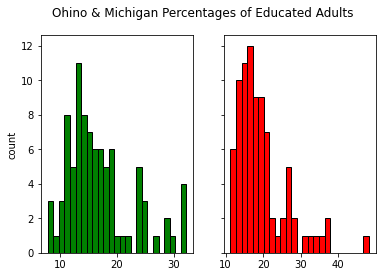

In [7]:
# histogram plot
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True)
fig.suptitle("Ohino & Michigan Percentages of Educated Adults")
ax1.hist(x=OH, bins=25, facecolor='green', ec="black");
ax2.hist(x=MI, bins=25, facecolor='red', ec="black");
ax1.set(ylabel="count");

From the histogram it is difficult to distinguish or identify the exact difference in means between the two states.

In [8]:
#find variance for each group
var_OH = np.var(OH)
var_MI = np.var(MI)

print(var_OH, var_MI)

# check if two groups have equal variances
if (var_MI / var_OH) < 4:
    print(var_MI / var_OH, "< 4 population variances are equal")
else:
    print(var_MI / var_OH, "> 4 population variances are not equal")

33.542259069907566 46.37210006335986
1.3824978206361356 < 4 population variances are equal


In [9]:
# perform two sample t-test on the two independent samples
stats.ttest_ind(OH, MI, equal_var=True)

Ttest_indResult(statistic=-2.60762654763255, pvalue=0.009933096837482136)

The two sample t-test performed above gives,

t-statistic = -2.608

p-value = 0.0099

### Interpretation of the results

The two hypothesis for the two sample t-test

Null Hypothesis - **H0: µ1 = µ2** (the two sample means are equal)

Alternative Hypothesis - **Ha: µ1 ≠ µ2** (the two sample means are not equal)

Similar to the one sample t-test the p-value is less than the cut off value of 0.05,therefore the null hypothesis can be rejected, there is less than 5% probability that the means of the two samples are equal. 

## Paired t-test

"A paired t-test is used when we are interested in the difference between two variables for the same subject" - [Boston Unversity's School of Public Health](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/sas/sas4-onesamplettest/SAS4-OneSampleTtest7.html#:~:text=A%20paired%20t%2Dtest%20is,in%201962%20for%20each%20subject.)

In the tutorial using the student sleep dataset, the mean increase in hours of sleep is compared between 2 different soporific drugs that were given to a group of 10 students. 

Because the effects of both drugs on each student is observed, it is possible to analyse this data using a paired t-test to compare the means.

In [16]:
# extra hours of sleep for group 1
group1 = df_sleep["extra"][df_sleep["group"] == 1]
# summary
group1.describe()

count    10.00000
mean      0.75000
std       1.78901
min      -1.60000
25%      -0.17500
50%       0.35000
75%       1.70000
max       3.70000
Name: extra, dtype: float64

The mean extra hours of sleep for drug 1 is 0.75 hours.

In [22]:
# extra hours of sleep for group 1
group2 = df_sleep["extra"][df_sleep["group"] == 2]
# summary
group2.describe()

count    10.000000
mean      2.330000
std       2.002249
min      -0.100000
25%       0.875000
50%       1.750000
75%       4.150000
max       5.500000
Name: extra, dtype: float64

The mean extra hours of sleep for drug 2 is 2.33 hours.

The difference in mean extra hours of sleep between drug 1 & drug 2 is 1.58 hours. 

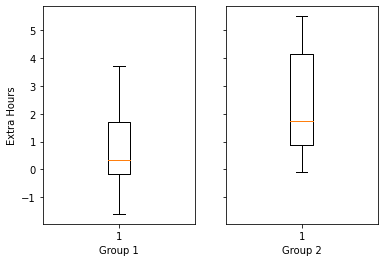

In [41]:
# box plots for extra hours of group 1 & group 2 
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True);
ax1.boxplot(group1);
ax1.set_xlabel("Group 1");
ax1.set_ylabel("Extra Hours");
ax2.boxplot(group2);
ax2.set_xlabel("Group 2");

From the box plots it would appear that the students under drug 2 gained more extra hours of sleep than under drug 1, the range of extra hours of sleep is larger.

In [42]:
# perform a paired t-test
stats.ttest_rel(group1, group2)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [43]:
df_sleep


,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


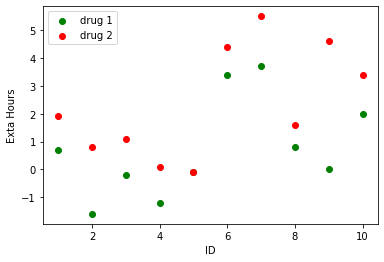

In [60]:
plt.scatter(x=df_sleep["ID"][df_sleep["group"]==1], y=group1, color='g', label="drug 1")
plt.scatter(x=df_sleep["ID"][df_sleep["group"]==2], y=group2, color='r', label="drug 2")
plt.xlabel("ID")
plt.ylabel("Exta Hours")
plt.legend()
plt.show()

Plotting a scatter plot with the extra sleep per student for each drug, shows that drug 2 provides consistently more extra sleep than drug 1, but it can also been seen that the amount of extra sleep gained is also on a individual basis.